# Obtain runtimes for model_stoch_vol for several dataset sizes

In [5]:
%matplotlib inline
import pyfolio as pf
import pandas as pd

In [2]:
stock_rets = pf.utils.get_symbol_rets('AAPL')

Apple stock is useful for this exercise because there are over 8000 returns

In [4]:
len(stock_rets)

8789

In [3]:
out_of_sample = stock_rets.index[-40]

In [15]:
returns_range = [100, 200, 400, 800, 1600, 3200]
pdtimes = []
for return_cutoff in returns_range:
    # Run model that assumes returns to be T-distributed
    stock_rets_truncate = stock_rets[-return_cutoff:]
    trace, alltimes = pf.bayesian.model_stoch_vol(stock_rets_truncate)
    pdtimes.append(alltimes)

Time to run priors was 0.121 seconds.
Time to run T was 0.045 seconds.
Time to run find_MAP was 2.910 seconds.
Time to run burn_in_step was 18.985 seconds.
Time to run burn_in_sample was 2.791 seconds.
Time to run full_step was 4.094 seconds.
Time to run full_sample was 37.636 seconds.
('total_time', 66.58209300041199)
('priors', 0.12076497077941895)
('full_step', 4.0940821170806885)
('find_MAP', 2.9102070331573486)
('full_sample', 37.635648012161255)
('T', 0.044561147689819336)
('burn_in_sample', 2.791260004043579)
('ndata', 100)
('burn_in_step', 18.985387802124023)
Time to run priors was 0.102 seconds.
Time to run T was 0.111 seconds.
Time to run find_MAP was 3.232 seconds.
Time to run burn_in_step was 18.412 seconds.
Time to run burn_in_sample was 3.935 seconds.
Time to run full_step was 4.518 seconds.
Time to run full_sample was 39.022 seconds.
('total_time', 69.3316421508789)
('priors', 0.10192418098449707)
('full_step', 4.518462896347046)
('find_MAP', 3.2320737838745117)
('full_s

In [16]:
pdtimes

[{'T': 0.044561147689819336,
  'burn_in_sample': 2.791260004043579,
  'burn_in_step': 18.985387802124023,
  'find_MAP': 2.9102070331573486,
  'full_sample': 37.635648012161255,
  'full_step': 4.0940821170806885,
  'ndata': 100,
  'priors': 0.12076497077941895,
  'total_time': 66.58209300041199},
 {'T': 0.11056303977966309,
  'burn_in_sample': 3.9347989559173584,
  'burn_in_step': 18.411814212799072,
  'find_MAP': 3.2320737838745117,
  'full_sample': 39.02178716659546,
  'full_step': 4.518462896347046,
  'ndata': 200,
  'priors': 0.10192418098449707,
  'total_time': 69.3316421508789},
 {'T': 0.09975504875183105,
  'burn_in_sample': 5.575446844100952,
  'burn_in_step': 20.11583113670349,
  'find_MAP': 3.157883882522583,
  'full_sample': 60.904815912246704,
  'full_step': 4.874194145202637,
  'ndata': 400,
  'priors': 0.12886595726013184,
  'total_time': 94.85694694519043},
 {'T': 0.12238097190856934,
  'burn_in_sample': 7.382929086685181,
  'burn_in_step': 20.09582495689392,
  'find_MAP'

In [17]:
timetable = pd.DataFrame(pdtimes)

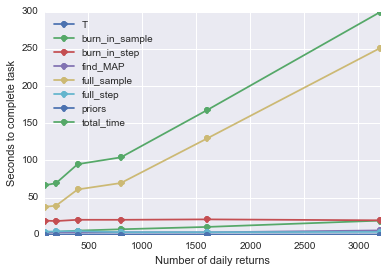

In [24]:
ax = timetable.plot(x='ndata', marker='o')
ax.set_xlabel('Number of daily returns')
ax.set_ylabel('Seconds to complete task')
import matplotlib.pyplot as plt
plt.savefig('Runtime_model_stoch_vol.png')